<a href="https://colab.research.google.com/github/osh9149/2022_AI/blob/main/001_%EB%82%98%EC%99%80_%EB%8B%AE%EC%9D%80_%EC%97%B0%EC%98%88%EC%9D%B8_%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.라이브러리 설치하기

In [ ]:
!pip install opencv-python
!pip install cmake
!pip install dlib
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,849 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

#런타임->런타임유형변경->GPU로 설정

#1. 필요 라이브러리 import

In [ ]:
import cv2, math
import matplotlib.pyplot as plt
import numpy as np
import dlib
import os #chdir사용시 필요함
import glob #파일 경로 
from google.colab.patches import cv2_imshow

from PIL import ImageFont, ImageDraw, Image
import tensorflow.keras 
from tensorflow.keras import backend as K

#구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#dlib에서 제공하는 데이터업로드

In [ ]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('/content/drive/MyDrive/sticker/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('/content/drive/MyDrive/sticker/dlib_face_recognition_resnet_model_v1.dat')

#2. 함수 정의

In [ ]:
def find_faces(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d)
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np


def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)
    
    
def draw(img, comment, x, y, h, size):
    fontpath = "/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf"
    font = ImageFont.truetype(fontpath, 20)

    img = Image.fromarray(img)
    print('11111111')
    draw = ImageDraw.Draw(img)
    print('22222222222')
    draw.text((x+5,y+h), comment, font=font, fill=(40,180,120))  
    print('3333333333333')

    return np.array(img)  

#3. 데이터 베이스 생성

glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다. 단, 조건에 정규식을 사용할 수 없으며 엑셀 등에서도 사용할 수 있는 '*'와 '?'같은 와일드카드만을 지원한다.

In [ ]:
label_name = []
label_class = {}
img_paths = glob.glob('/content/drive/MyDrive/kpop_img/*')

for path in img_paths:
    # print(path)
    name = path.split(".")[0][9:]
    print(name)
    label_name.append(name)
    label_class[name] = path

# print(label_name)
# print(label_class)
# print(len(label_class))

drive/MyDrive/kpop_img/김유정
drive/MyDrive/kpop_img/한소희
drive/MyDrive/kpop_img/한지민
drive/MyDrive/kpop_img/박민영
drive/MyDrive/kpop_img/박수진
drive/MyDrive/kpop_img/고윤정
drive/MyDrive/kpop_img/아이린
drive/MyDrive/kpop_img/장원영
drive/MyDrive/kpop_img/손예진
drive/MyDrive/kpop_img/정해인
drive/MyDrive/kpop_img/이정재
drive/MyDrive/kpop_img/장승조
drive/MyDrive/kpop_img/유아인
drive/MyDrive/kpop_img/뷔
drive/MyDrive/kpop_img/송강
drive/MyDrive/kpop_img/김종국
drive/MyDrive/kpop_img/김수현
drive/MyDrive/kpop_img/안효섭
drive/MyDrive/kpop_img/손석구
drive/MyDrive/kpop_img/박보검
drive/MyDrive/kpop_img/김우빈
drive/MyDrive/kpop_img/이병헌
drive/MyDrive/kpop_img/이광수
drive/MyDrive/kpop_img/남주혁
drive/MyDrive/kpop_img/박서준
drive/MyDrive/kpop_img/유재석
drive/MyDrive/kpop_img/서강준
drive/MyDrive/kpop_img/송혜교
drive/MyDrive/kpop_img/김세정
drive/MyDrive/kpop_img/김태리
drive/MyDrive/kpop_img/강동원
drive/MyDrive/kpop_i

In [ ]:
descs = []

for name, label_path in label_class.items():
    img = cv2.imread(label_path)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR -> RGB
    _, img_shapes, _ = find_faces(img)
    descs.append([name, encode_faces(img, img_shapes)[0]])

np.save('descs.npy', descs)
#print(descs)

NameError: ignored

#4. 저장된 파일 중에서 나와 닮은 연예인 찾기

In [ ]:
test_path='/content/drive/MyDrive/test_img/'
img = cv2.imread(test_path+'kk.jpg') #테스트할 사진이름

img = cv2.flip(img, 1) # 좌우 대칭
rects, shapes, _ = find_faces(img) # 얼굴 찾기
descriptors = encode_faces(img, shapes) # 인코딩

if(len(descriptors) == 0):
    print("얼굴 인식이 안되었네요ㅜㅜ \n다시 찍어주세요!")
elif(len(descriptors) > 1):
    print("여러 명이 인식이 되었네요ㅜㅜ \n혼자 다시 찍어주세요!")
else:
    desc = descriptors[0]
    x = rects[0][0][0] # 얼굴 X 좌표
    y = rects[0][0][1] # 얼굴 Y 좌표
    w = rects[0][1][1]-rects[0][0][1] # 얼굴 너비 
    h = rects[0][1][0]-rects[0][0][0] # 얼굴 높이        

    descs1 = sorted(descs, key=lambda x: np.linalg.norm([desc] - x[1]))
    dist = np.linalg.norm([desc] - descs1[0][1], axis=1)
    if dist < 0.5:
        name = descs1[0][0]
        img_name=name[len(img_paths)+2:]
        comment = "{0} 닮으셨네요. 올~~".format(img_name.split(".")[0]) 
        print(name)
        img = cv2.imread(label_class[name])
#             img = cv2.resize(img, dsize=(780, 520))
        result = draw(img, comment, x-10, y, h, 36)
    else:
        comment = "닮은 연예인이 없네요\nㅜㅜ 개성있는 얼굴입니다!\n"
        img = cv2.imread(test_path+'ojing.png')
        result = draw(img, comment, 50, 10, h, 24)

    print("거리: %.3f" % dist[0])
    print(comment)
#    cv2.imshow(name, result)
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB) # BGR -> RGB
    plt.imshow(result)

cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: ignored

#닮은 연예인 찾기(실시간으로 찍어서 찾기)

#구글 코랩에서 웹캠 사용하는 코드

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#웹캠에 나온 사진 캡쳐하여 저장

<IPython.core.display.Javascript object>

Saved to photo.jpg


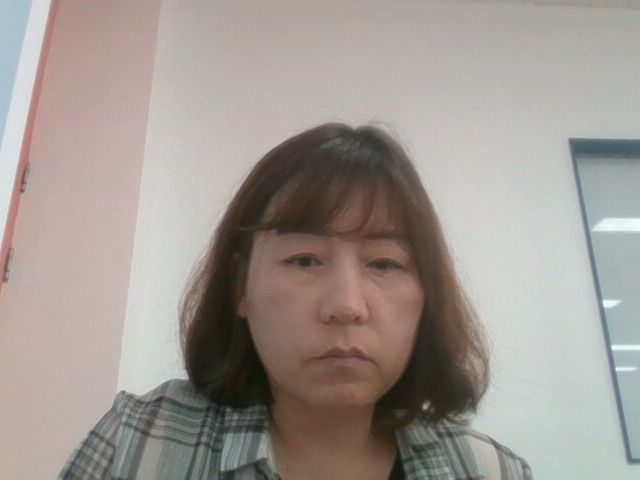

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

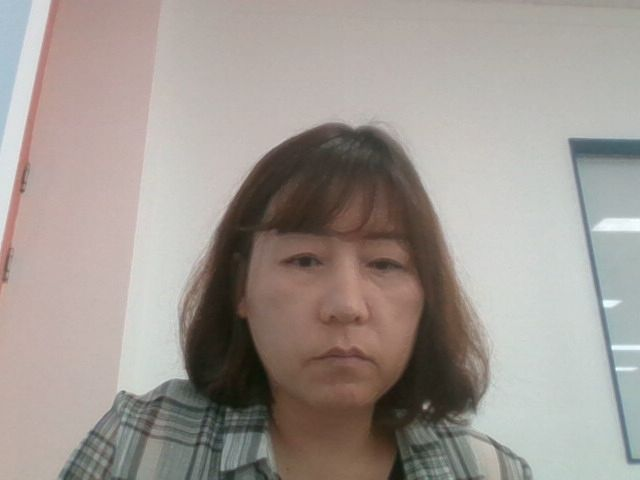

In [ ]:
from google.colab.patches import cv2_imshow
# !curl -o photo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img=cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)




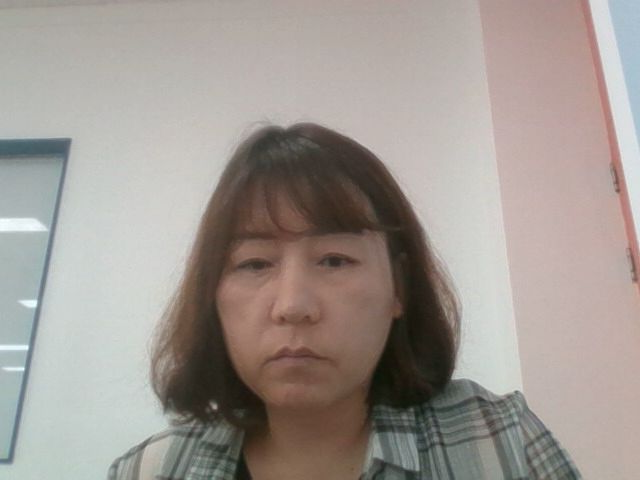

In [ ]:
frame=cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
frame = cv2.flip(frame, 1) # 좌우 대칭
cv2_imshow(frame)
    
 

In [ ]:
user_name = input("너의 이름은? ") # 사용자 이름 입력
frame=cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
frame = cv2.flip(frame, 1) # 좌우 대칭
# cv2_imshow(frame)

rects, shapes, _ = find_faces(frame) # 얼굴 찾기
descriptors = encode_faces(frame, shapes) # 인코딩

if(len(descriptors) == 0):
  print("얼굴 인식이 안되었네요ㅜㅜ \n다시 찍어주세요!")
elif(len(descriptors) > 1):
  print("여러 명이 인식이 되었네요ㅜㅜ \n혼자 다시 찍어주세요!")
else:
  desc = descriptors[0]
  x = rects[0][0][0] # 얼굴 X 좌표
  y = rects[0][0][1] # 얼굴 Y 좌표
  w = rects[0][1][1]-rects[0][0][1] # 얼굴 너비 
  h = rects[0][1][0]-rects[0][0][0] # 얼굴 높이        

  descs1 = sorted(descs, key=lambda x: np.linalg.norm([desc] - x[1]))
  dist = np.linalg.norm([desc] - descs1[0][1], axis=1)
  if dist < 0.45:
    comment = "{0}을 닮으셨네요. 올~~".format(name) 
    img = cv2.imread(label_class[name])
    #img = cv2.resize(img, dsize=(780, 520))
    result = draw(img, comment, x-10, y, h, 36)
  else:
    print(dist)
    comment = "{0}님은 닮은 연예인이 없네요\nㅜㅜ 개성만점얼굴입니다!\n".format(user_name)
    img = cv2.imread("test_img/ojing.png")
  #  img = cv2.resize(img, dsize=(w, h+30)) 
    # frame[y-30:y+h, x:x+w] = img 
    result = draw(frame, comment, 50, 10, h, 24)

    print(comment)
  # cv2.imshow(name, result)
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB) # BGR -> RGB
    plt.imshow(result)


너의 이름은? ttt


NameError: ignored

In [ ]:
user_name = input("너의 이름은? ") # 사용자 이름 입력

cap = cv2.VideoCapture(0) # 노트북 웹캠을 카메라로 사용
cap.set(3,640) # 너비
cap.set(4,480) # 높이

while(True):
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1) # 좌우 대칭
    
    cv2.imshow('frame', frame)
    
    k = cv2.waitKey(30) & 0xff 
    if k == 49: # 1 키를 누르면 사진 찍음.
        cap.release()
        cv2.destroyAllWindows()
        
        rects, shapes, _ = find_faces(frame) # 얼굴 찾기
        descriptors = encode_faces(frame, shapes) # 인코딩

        if(len(descriptors) == 0):
            print("얼굴 인식이 안되었네요ㅜㅜ \n다시 찍어주세요!")
        elif(len(descriptors) > 1):
            print("여러 명이 인식이 되었네요ㅜㅜ \n혼자 다시 찍어주세요!")
        else:
            desc = descriptors[0]
            x = rects[0][0][0] # 얼굴 X 좌표
            y = rects[0][0][1] # 얼굴 Y 좌표
            w = rects[0][1][1]-rects[0][0][1] # 얼굴 너비 
            h = rects[0][1][0]-rects[0][0][0] # 얼굴 높이        

            descs1 = sorted(descs, key=lambda x: np.linalg.norm([desc] - x[1]))
            dist = np.linalg.norm([desc] - descs1[0][1], axis=1)
            if dist < 0.45:
                name = descs1[0][0]
                comment = "{0}을 닮으셨네요. 올~~".format(name) 
                img = cv2.imread(label_class[name])
#                 img = cv2.resize(img, dsize=(780, 520))
                result = draw(img, comment, x-10, y, h, 36)
            else:
                print(dist)
                comment = "{0}님은 닮은 연예인이 없네요\nㅜㅜ 성형하고 오세요!\n".format(user_name)
                img = cv2.imread("test_img/ojingeo1.png")
                img = cv2.resize(img, dsize=(w, h+30)) 
                frame[y-30:y+h, x:x+w] = img 
                result = draw(frame, comment, 50, 10, h, 24)

            print(comment)
#             cv2.imshow(name, result)
            result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB) # BGR -> RGB
            plt.imshow(result)

        break
    
cv2.waitKey(0)
cv2.destroyAllWindows()